In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import preprocessing

#### 한글 인코딩 문제 해결

In [3]:
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font',family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
else:
    print('err')

## 정당별 공약집 빈출단어

In [4]:
df_free = pd.read_csv('d_free.txt',sep=' ',names=['word','freq'])
df_free['sep'] = 'free'
print(df_free.shape)
df_free.head()

(1000, 3)


,word,freq,sep
0,및,534,free
1,등,455,free
2,지원,274,free
3,확대,270,free
4,추진,260,free


In [5]:
df_gukmin = pd.read_csv('d_gukmin.txt',sep=' ',names=['word','freq'])
df_gukmin['sep'] = 'gukmin'
print(df_gukmin.shape)
df_gukmin.head()

(1000, 3)


,word,freq,sep
0,등,407,gukmin
1,및,388,gukmin
2,목표,273,gukmin
3,지원,272,gukmin
4,확대,260,gukmin


In [6]:
df_justice = pd.read_csv('d_justice.txt',sep=' ',names=['word','freq'])
df_justice['sep'] = 'justice'
print(df_justice.shape)
df_justice.head()

(1000, 3)


,word,freq,sep
0,등,747,justice
1,및,553,justice
2,확대,324,justice
3,약속,321,justice
4,진단,313,justice


In [7]:
df_minju = pd.read_csv('d_minju.txt',sep=' ',names=['word','freq'])
df_minju['sep'] = 'minju'
print(df_minju.shape)
df_minju.head()

(1000, 3)


,word,freq,sep
0,및,789,minju
1,비,682,minju
2,전,616,minju
3,지원,564,minju
4,등,557,minju


In [8]:
df_right = pd.read_csv('d_right.txt',sep=' ',names=['word','freq'])
df_right['sep'] = 'right'
print(df_right.shape)
df_right.head()

(1000, 3)


,word,freq,sep
0,생각,323,right
1,등,281,right
2,지원,259,right
3,및,257,right
4,산업,256,right


In [9]:
df_comb = pd.concat([df_free,df_gukmin,df_justice,df_minju,df_right], join='inner')
df_comb.shape

(5000, 3)

### 빈출단어 테이블 재정렬 : 정당별 단어 출현횟수 (freq)

In [10]:
df_comb = pd.pivot_table(df_comb, index='word', columns='sep', values='freq')

In [11]:
df_comb = df_comb.fillna(0)
df_comb.reset_index(inplace=True)
df_comb

sep,word,free,gukmin,justice,minju,right
0,가격,10.0,8.0,18.0,0.0,7.0
1,가계,10.0,0.0,0.0,0.0,0.0
2,가계부채,0.0,6.0,0.0,0.0,0.0
3,가관,12.0,0.0,0.0,0.0,0.0
4,가구,36.0,22.0,58.0,17.0,29.0
...,...,...,...,...,...,...
1903,휴식,0.0,13.0,0.0,16.0,0.0
1904,휴양,8.0,0.0,0.0,0.0,0.0
1905,휴직,0.0,0.0,0.0,13.0,6.0
1906,희망,11.0,19.0,0.0,9.0,7.0


In [12]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   word     1908 non-null   object 
 1   free     1908 non-null   float64
 2   gukmin   1908 non-null   float64
 3   justice  1908 non-null   float64
 4   minju    1908 non-null   float64
 5   right    1908 non-null   float64
dtypes: float64(5), object(1)
memory usage: 89.6+ KB


In [13]:
df_word = df_comb.iloc[:,0:1]
df_word.reset_index(inplace=True)
df_word

sep,index,word
0,0,가격
1,1,가계
2,2,가계부채
3,3,가관
4,4,가구
...,...,...
1903,1903,휴식
1904,1904,휴양
1905,1905,휴직
1906,1906,희망


### 단어 출현횟수 정규화

In [14]:
df_scale = df_comb.iloc[:,1:6]

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_scale)
df_scale = pd.DataFrame(x_scaled, columns = df_scale.columns)

In [16]:
df_scale.reset_index(inplace=True)
df_scale

sep,index,free,gukmin,justice,minju,right
0,0,0.018727,0.019656,0.024096,0.000000,0.021672
1,1,0.018727,0.000000,0.000000,0.000000,0.000000
2,2,0.000000,0.014742,0.000000,0.000000,0.000000
3,3,0.022472,0.000000,0.000000,0.000000,0.000000
4,4,0.067416,0.054054,0.077644,0.021546,0.089783
...,...,...,...,...,...,...
1903,1903,0.000000,0.031941,0.000000,0.020279,0.000000
1904,1904,0.014981,0.000000,0.000000,0.000000,0.000000
1905,1905,0.000000,0.000000,0.000000,0.016477,0.018576
1906,1906,0.020599,0.046683,0.000000,0.011407,0.021672


### 정규화된 단어출현횟수 테이블

In [17]:
df_merge = pd.merge(df_word, df_scale, on='index')
df_merge.head()

sep,index,word,free,gukmin,justice,minju,right
0,0,가격,0.018727,0.019656,0.024096,0.000000,0.021672
1,1,가계,0.018727,0.000000,0.000000,0.000000,0.000000
2,2,가계부채,0.000000,0.014742,0.000000,0.000000,0.000000
3,3,가관,0.022472,0.000000,0.000000,0.000000,0.000000
4,4,가구,0.067416,0.054054,0.077644,0.021546,0.089783


In [18]:
df_merge = df_merge.drop(['index'], axis=1)

In [19]:
df_merge.set_index('word',inplace=True)

In [20]:
df_merge

sep,free,gukmin,justice,minju,right
word,,,,,
가격,0.018727,0.019656,0.024096,0.000000,0.021672
가계,0.018727,0.000000,0.000000,0.000000,0.000000
가계부채,0.000000,0.014742,0.000000,0.000000,0.000000
가관,0.022472,0.000000,0.000000,0.000000,0.000000
가구,0.067416,0.054054,0.077644,0.021546,0.089783
...,...,...,...,...,...
휴식,0.000000,0.031941,0.000000,0.020279,0.000000
휴양,0.014981,0.000000,0.000000,0.000000,0.000000
휴직,0.000000,0.000000,0.000000,0.016477,0.018576


In [21]:
df_merge.corr() #           free     gukmin     justice     minju      right
                #   free 1.000000 > 0.717222 > 0.721583 > 0.708913 > 0.767163

sep,free,gukmin,justice,minju,right
sep,,,,,
free,1.000000,0.717222,0.721583,0.708913,0.767163
gukmin,0.717222,1.000000,0.725700,0.661779,0.684798
justice,0.721583,0.725700,1.000000,0.668365,0.671861
minju,0.708913,0.661779,0.668365,1.000000,0.602776
right,0.767163,0.684798,0.671861,0.602776,1.000000


### 정당별 정책공약집(단어) 간 상관관계도

* 자유한국당기준

|free|gukmin|justice|minju|right|
|--|--|--|--|--|
|1.00|0.717|0.721|0.708|0.767|

## 자유 - 바른 - 정의 - 국민 - 민주

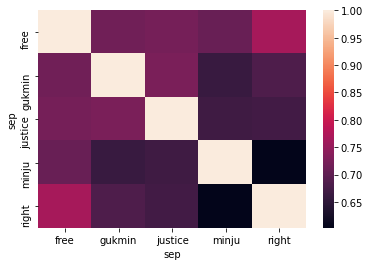

In [22]:
ax = sns.heatmap(df_merge.corr())
plt.show()

In [23]:
# 출현단어 집합
df_word['word']

0         가격
1         가계
2       가계부채
3         가관
4         가구
        ... 
1903      휴식
1904      휴양
1905      휴직
1906      희망
1907      희생
Name: word, Length: 1908, dtype: object

## 정당별 출현단어

In [24]:
df_combination = df_comb
df_combination

sep,word,free,gukmin,justice,minju,right
0,가격,10.0,8.0,18.0,0.0,7.0
1,가계,10.0,0.0,0.0,0.0,0.0
2,가계부채,0.0,6.0,0.0,0.0,0.0
3,가관,12.0,0.0,0.0,0.0,0.0
4,가구,36.0,22.0,58.0,17.0,29.0
...,...,...,...,...,...,...
1903,휴식,0.0,13.0,0.0,16.0,0.0
1904,휴양,8.0,0.0,0.0,0.0,0.0
1905,휴직,0.0,0.0,0.0,13.0,6.0
1906,희망,11.0,19.0,0.0,9.0,7.0


# 출현횟수 0번

In [25]:
free_N = df_combination[df_combination['free']==0]['word']
free_N = pd.DataFrame(free_N)
free_N['sep2'] = 'N_free'
free_N.head()

,word,sep2
2,가계부채,N_free
7,가동,N_free
8,가맹,N_free
9,가스,N_free
10,가습기,N_free


In [26]:
gukmin_N = df_combination[df_combination['gukmin']==0]['word']
gukmin_N = pd.DataFrame(gukmin_N)
gukmin_N['sep2'] = 'N_gukmin'
gukmin_N.head()

,word,sep2
1,가계,N_gukmin
3,가관,N_gukmin
8,가맹,N_gukmin
9,가스,N_gukmin
11,가운데,N_gukmin


In [27]:
justice_N = df_combination[df_combination['justice']==0]['word']
justice_N = pd.DataFrame(justice_N)
justice_N['sep2'] = 'N_justice'
justice_N.head()

,word,sep2
1,가계,N_justice
2,가계부채,N_justice
3,가관,N_justice
6,가능성,N_justice
7,가동,N_justice


In [28]:
minju_N = df_combination[df_combination['minju']==0]['word']
minju_N = pd.DataFrame(minju_N)
minju_N['sep2'] = 'N_minju'
minju_N.head()

,word,sep2
0,가격,N_minju
1,가계,N_minju
2,가계부채,N_minju
3,가관,N_minju
5,가능,N_minju


In [29]:
right_N = df_combination[df_combination['right']==0]['word']
right_N = pd.DataFrame(right_N)
right_N['sep2'] = 'N_right'
right_N.head()

,word,sep2
1,가계,N_right
2,가계부채,N_right
3,가관,N_right
6,가능성,N_right
8,가맹,N_right


In [46]:
df_comb2 = pd.concat([free_N,gukmin_N,justice_N,minju_N,right_N], join='inner')
df_comb2['cnt'] = 1
df_comb2.sep2.unique()

array(['N_free', 'N_gukmin', 'N_justice', 'N_minju', 'N_right'],
      dtype=object)

In [47]:
df_comb2 = pd.pivot_table(df_comb2, index='word', columns='sep2', values='cnt')
df_comb2 = df_comb2.fillna(0)
# 1.0 = 해당 정당에서 나오지 않은 단어 

In [48]:
df_comb2['sum']=df_comb2.sum(axis=1)
df_comb2.head()

sep2,N_free,N_gukmin,N_justice,N_minju,N_right,sum
word,,,,,,
가격,0.0,0.0,0.0,1.0,0.0,1.0
가계,0.0,1.0,1.0,1.0,1.0,4.0
가계부채,1.0,0.0,1.0,1.0,1.0,4.0
가관,0.0,1.0,1.0,1.0,1.0,4.0
가능,0.0,0.0,0.0,1.0,0.0,1.0
